In [1]:
#sklearn 包实现正则化解决过拟合
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

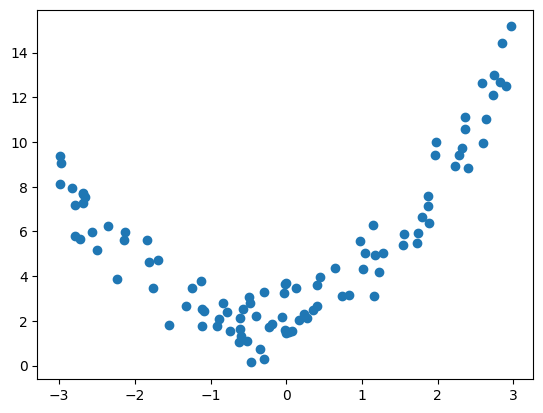

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 + x ** 2 + x + 2 + np.random.normal(0, 1, size=100)
plt.scatter(x, y)

In [3]:
lin_reg = LinearRegression()

In [4]:
def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', lin_reg)
    ])

In [5]:
from sklearn.linear_model import Lasso
#构建Lasso回归算法（L1范数）
def LassoRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lasso_reg', Lasso(alpha=alpha))
    ])

In [6]:
from sklearn.linear_model import Ridge
#构建Ridge回归算法（L2范数）
def RidgeRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('ridge_reg', Ridge(alpha=alpha))
    ])

In [7]:
#设置随机种子
np.random.seed(666)
#构建数据集
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
#设置L1训练参数
lasso_reg1 = LassoRegression(30, 0.1)
lasso_reg1.fit(X_train,y_train)
#训练模型
y1_predict=lasso_reg1.predict(X_test)
#模型准确率
mean_squared_error(y_test,y1_predict)

0.8710197198608622

In [11]:
ridge_reg2 = RidgeRegression(30, 0.1)
ridge_reg2.fit(X_train,y_train)
y2_predict=ridge_reg2.predict(X_test)
mean_squared_error(y_test,y2_predict)

1.0486112638660117

In [17]:
poly30_reg = PolynomialRegression(degree=30)
poly30_reg.fit(X_train, y_train)
y30_predict = poly30_reg.predict(X_test)
mean_squared_error(y_test, y30_predict)

1593.426579753822

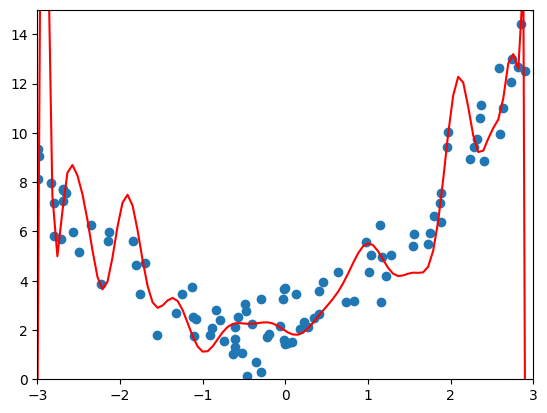

In [14]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly30_reg.predict(X_plot)
plt.scatter(X, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, 0, 15])
plt.show()

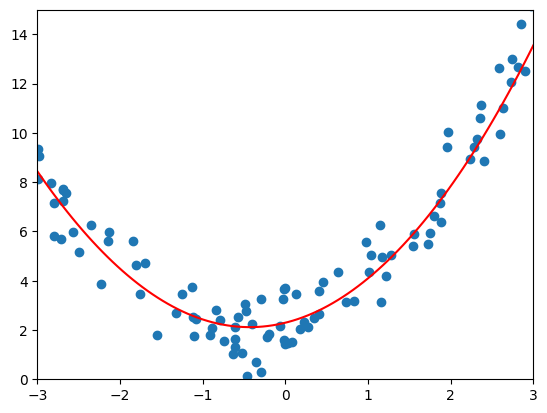

In [15]:
y_plot = lasso_reg1.predict(X_plot)
plt.scatter(X, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, 0, 15])
plt.show()

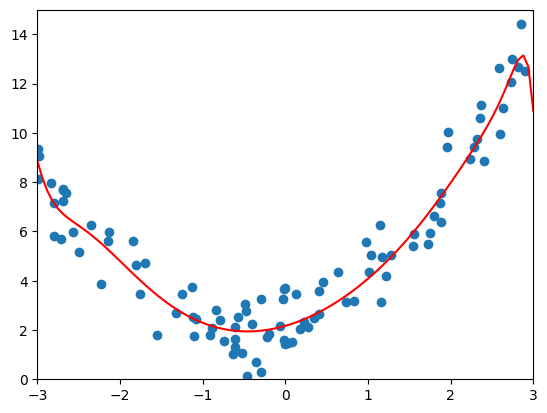

In [16]:
y_plot = ridge_reg2.predict(X_plot)
plt.scatter(X, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, 0, 15])
plt.show()